In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [9]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [10]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [12]:
df.shape

(200, 5)

In [13]:
le = LabelEncoder()

In [16]:
df["Age"] = le.fit_transform(df["Age"])
df["Genre"] = le.fit_transform(df["Genre"])

In [17]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,1,15,39
1,2,1,3,15,81
2,3,0,2,16,6
3,4,0,5,16,77
4,5,0,13,17,40


Text(0, 0.5, 'Annual Income (k$)')

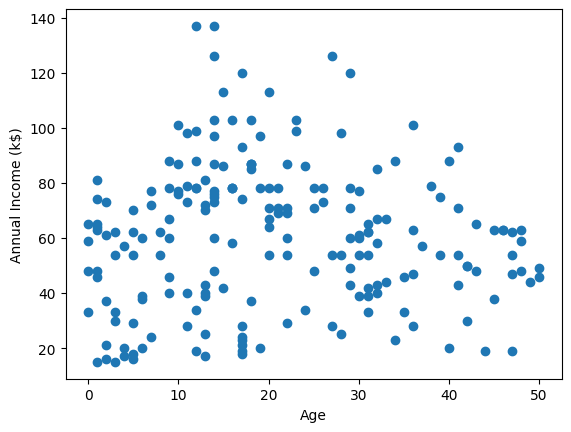

In [20]:
plt.scatter(df['Age'],df['Annual Income (k$)'])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

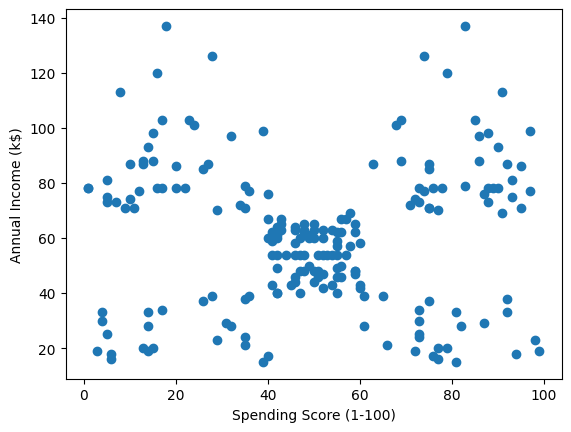

In [22]:
plt.scatter(df["Spending Score (1-100)"],df['Annual Income (k$)'])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

In [23]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]]

In [24]:
sse = []
for k in range(1,11):
  kmean = KMeans(n_clusters=k,random_state=42)
  kmean.fit(X)
  sse.append(kmean.inertia_)

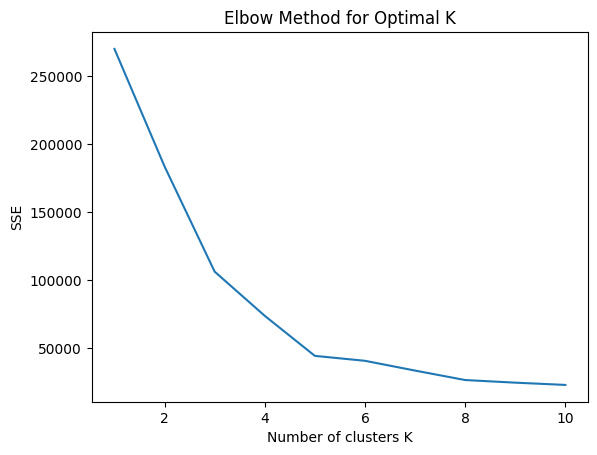

In [26]:
plt.plot(range(1,11),sse)
plt.xlabel('Number of clusters K')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

In [27]:
scale = StandardScaler()

In [28]:
X_scale = scale.fit_transform(X)

In [29]:
k = 5

In [30]:
kmean = KMeans(n_clusters=k,random_state=42)

In [31]:
clusters = kmean.fit_predict(X_scale)
df["Cluster"] = clusters

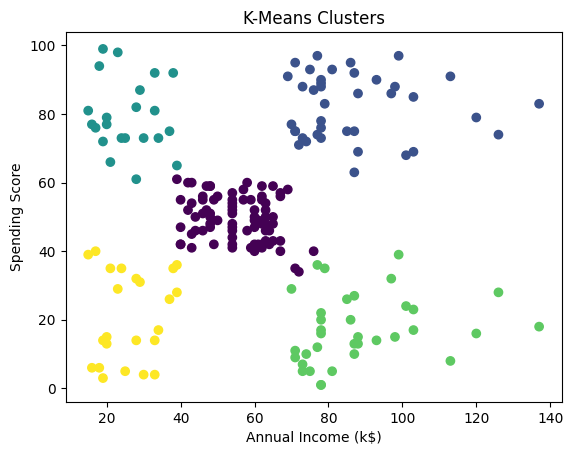

In [32]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('K-Means Clusters')
plt.show()